# ディリクレ分布

----

【編集履歴】

- 2022/10/18：「計算」と「作図」を追加

----

In [1]:
# 更新日時を出力
import datetime
now = datetime.datetime.now()
print('更新日時：' + '{0:%Y-%m-%d %H:%M}'.format(now))

更新日時：2022-10-19 00:53


# ディリクレ分布の計算

　ディリクレ分布(Dirichlet Distribution)の確率密度と統計量の計算を行います。ディリクレ分布については「定義式の確認」を参照してください。  
<br>

　利用するライブラリを読み込みます。

In [2]:
# 利用ライブラリ
import numpy as np
from scipy.special import gamma, loggamma, digamma
from scipy.stats import dirichlet

<br>

## 確率密度の計算

　ディリクレ分布に従う確率密度を計算する方法をいくつか確認します。  
<br>

### パラメータの設定

　ディリクレ分布のパラメータ$\boldsymbol{\beta}$、確率変数の値$\boldsymbol{\phi}$を設定します。

In [3]:
# パラメータを指定
beta_v = np.array([0.4, 0.2, 0.3])

# 確率変数の値を指定
phi_v = np.array([0.5, 0.3, 0.2])

　$V$次元ベクトル$\boldsymbol{\beta} = (\beta_1, \beta_2, \cdots, \beta_V)$、$\boldsymbol{\phi} = (\phi_1, \phi_2, \cdots, \phi_V)$を指定します。  
　パラメータの各要素は$\beta_v > 0$を満たす必要があり、確率変数の各要素は$0 \leq \phi_v \leq 1$、$\sum_{v=1}^V \phi_v = 1$をとります。  
<br>

### スクラッチで計算

　定義式から計算します。

In [4]:
# 定義式により確率密度を計算
C = gamma(np.sum(beta_v)) / np.prod(gamma(beta_v))
dens = C * np.prod(phi_v**(beta_v - 1))
print(dens)

0.4297763573774013


　ディリクレ分布は、次の式で定義されます。

$$
\begin{aligned}
C_{\mathrm{Dir}}
   &= \frac{
          \Gamma(\sum_{v=1}^V \beta_v)
      }{
          \prod_{v=1}^V \Gamma(\beta_v)
      }
\\
\mathrm{Dir}(\boldsymbol{\phi} | \boldsymbol{\beta})
   &= C_{\mathrm{Dir}}
      \prod_{v=1}^V
          \phi_v^{\beta_v-1}
\end{aligned}
$$

　ここで、$C_{\mathrm{Dir}}$はディリクレ分布の正規化係数、$\Gamma(x)$はガンマ関数です。  
　ガンマ関数は`SciPy`ライブラリの`special`モジュールの`gamma()`で計算できます。  

　対数をとった定義式から計算します。

In [5]:
# 対数をとった定義式により確率密度を計算
log_C = loggamma(sum(beta_v)) - np.sum(loggamma(beta_v))
log_dens = log_C + np.sum((beta_v - 1) * np.log(phi_v))
dens = np.exp(log_dens)
print(dens)
print(log_dens)

0.42977635737740116
-0.8444903047153147


　対数をとった定義式を計算します。

$$
\begin{aligned}
\log C_{\mathrm{Dir}}
   &= \log \Gamma \Bigl(
          \sum_{v=1}^V \beta_v
      \Bigr)
      - \sum_{v=1}^V
          \log \Gamma(\beta_v)
\\
\log \mathrm{Dir}(\boldsymbol{\phi} | \boldsymbol{\beta})
   &= \log C_{\mathrm{Dir}}
      + \sum_{v=1}^V
          (\beta_v - 1 )\log \phi_v
\end{aligned}
$$

　対数をとったガンマ関数は、`loggamma()`で計算できます。引数の値が大きいと`gamma()`の計算結果が発散してしまいます。その場合でも、`loggamma()`で計算できます。  
　計算結果の指数をとると確率密度が得られます。

$$
 \mathrm{Dir}(\boldsymbol{\phi} | \boldsymbol{\beta})
    = \exp \Bigr(
          \log  \mathrm{Dir}(\boldsymbol{\phi} | \boldsymbol{\beta})
      \Bigr)
$$

　指数と対数の性質より$\exp(\log x) = x$です。  

　次は、関数を使って確率密度を計算します。  
<br>

### モジュールで計算

　`SciPy`ライブラリの`stats`モジュールの`dirichlet`の確率密度関数`pdf()`で計算します。

In [6]:
# 関数により確率密度を計算
dens = dirichlet.pdf(x=phi_v, alpha=beta_v)
print(dens)

0.42977635737740116


　確率変数の引数`x`に`phi_v`、パラメータの引数`alpha`に`beta_v`を指定します。  

　`logpdf()`だと対数をとった確率密度を計算します。

In [7]:
# 対数をとった関数により確率密度を計算
log_dens = dirichlet.logpdf(x=phi_v, alpha=beta_v)
dens = np.exp(log_dens)
print(dens)
print(log_dens)

0.42977635737740116
-0.8444903047153147


　計算結果の指数をとると確率密度が得られます。  
<br>

　全てのパラメータが1未満で確率変数に0を含むとエラーになるようです。

In [8]:
# パラメータを指定
beta_v = np.array([0.4, 0.2, 0.3])

# 確率変数の値を指定
phi_v = np.array([0.6, 0.4, 0.0])

# 関数により確率密度を計算
dens = dirichlet.pdf(x=phi_v, alpha=beta_v)
print(dens)

ValueError: Each entry in 'x' must be greater than zero if its alpha is less than one.

　1以上の値だとエラーになりません。

In [9]:
# パラメータを指定
beta_v = np.array([0.4, 0.2, 3.0])

# 確率変数の値を指定
phi_v = np.array([0.6, 0.4, 0.0])

# 関数により確率密度を計算
dens = dirichlet.pdf(x=phi_v, alpha=beta_v)
print(dens)

0.0


　なぜこんな挙動を？  
<br>

## 統計量の計算

　次は、ディリクレ分布の統計量を計算します。詳しくは「統計量の導出」を参照してください。  
<br>

　ディリクレ分布のパラメータ$\boldsymbol{\beta}$と次元数$V$を設定します。

In [10]:
# パラメータを指定
beta_v = np.array([4.0, 2.0, 3.0])

# 次元数を設定
V = len(beta_v)

<br>

　期待値を計算します。

In [11]:
# 期待値を計算
E_phi_v = beta_v / np.sum(beta_v)
print(E_phi_v)

[0.44444444 0.22222222 0.33333333]


　ディリクレ分布の期待値は、次の式で計算できます。

$$
\mathbb{E}[\phi_v]
    = \frac{\beta_v}{\sum_{v'=1}^V \beta_{v'}}
$$

　分散を計算します。

In [12]:
# 分散を計算
V_phi_v = beta_v * (np.sum(beta_v) - beta_v)
V_phi_v /= np.sum(beta_v)**2 * (np.sum(beta_v) + 1.0)
print(V_phi_v)

[0.02469136 0.01728395 0.02222222]


　ディリクレ分布の分散は、次の式で計算できます。

$$
\mathbb{V}[\phi_v]
    = \frac{
          \beta_v \left\{
              \left(
                  \sum_{v=1}^V \beta_v
              \right)
              - \beta_v
          \right\}
      }{
          \left(
              \sum_{v=1}^V \beta_v
          \right)^2
          \left\{
              \left(
                  \sum_{v=1}^V \beta_v
              \right)
              + 1
          \right\}
      }
$$

　要素を指定して、共分散を計算します。

In [13]:
# インデックスを指定:(i ≠ j)
i = 0
j = 1

# 共分散を計算
Cov_phi_ij = -beta_v[i] * beta_v[j]
Cov_phi_ij /= np.sum(beta_v)**2 * (np.sum(beta_v) + 1.0)
print(Cov_phi_ij)

-0.009876543209876543


　ディリクレ分布の共分散は、次の式で計算できます。

$$
\mathrm{Cov}[\phi_i, \phi_j]
    = \frac{
          \beta_i \beta_j
      }{
          \left(
              \sum_{v=1}^V \beta_v
          \right)^2
          \left\{
              \left(
                  \sum_{v=1}^V \beta_v
              \right)
              + 1
          \right\}
      }
    \qquad
      (i \neq j)
$$

　全ての要素の組み合わせで、共分散を計算します。

In [14]:
# 共分散を計算
Cov_phi_vv = -np.dot(beta_v.reshape(V, 1), beta_v.reshape(1, V))
Cov_phi_vv /= np.sum(beta_v)**2 * (np.sum(beta_v) + 1.0)
Cov_phi_vv[np.arange(V), np.arange(V)] = np.nan
print(Cov_phi_vv)

[[        nan -0.00987654 -0.01481481]
 [-0.00987654         nan -0.00740741]
 [-0.01481481 -0.00740741         nan]]


　ただし、$i = j$の場合は計算できないので、対角要素を欠損値`np.nan`に置き換えます。  

　最頻値(モード)を計算します。

In [15]:
# 最頻値を計算:(β_v > 1)
mode_phi_v = (beta_v - 1.0) / (np.sum(beta_v) - V)
print(mode_phi_v)

[0.5        0.16666667 0.33333333]


　ディリクレ分布の最頻値は、次の式で計算できます。

$$
\mathrm{mode}[\phi_v]
    = \frac{
          \beta_v - 1
      }{
          \left(
              \sum_{v=1}^V \beta_v
          \right)
          - V
      }
    \qquad
      (\beta_v > 1)
$$

　対数の期待値を計算します。

In [16]:
# 対数の期待値を計算
E_log_phi_v = digamma(beta_v) - digamma(np.sum(beta_v))
print(E_log_phi_v)

[-0.88452381 -1.71785714 -1.21785714]


　対数をとった変数の期待値は、次の式で計算できます。

$$
\mathbb{E}[\log \phi_v]
    = \Psi(\beta_v)
      - \Psi \Bigl(
            \sum_{v=1}^V \beta_v
        \Bigr)
$$

　ここで、$\Psi(x)$はディガンマ関数で、`digamma()`で計算できます。  
<br>

　この記事では、ディリクレ分布の計算を確認しました。次は、グラフを作成します。  
<br>

# ディリクレ分布の作図

　ディリクレ分布(Dirichlet Distribution)のグラフを作成します。ディリクレ分布については「定義式の確認」を参照してください。  
<br>

　利用するライブラリを読み込みます。

In [17]:
# 利用ライブラリ
import numpy as np
from scipy.stats import dirichlet
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

<br>

## 定義式の確認

　まずは、ディリクレ分布の定義式を確認します。  
<br>

　ディリクレ分布は、次の式で定義されます。

$$
\mathrm{Dir}(\boldsymbol{\phi} | \boldsymbol{\beta})
    = \frac{
          \Gamma(\sum_{v=1}^V \beta_v)
      }{
          \prod_{v=1}^V \Gamma(\beta_v)
      }
      \prod_{v=1}^V
          \phi_v^{\beta_v-1}
$$

　ここで、$V$は次元数で、$\boldsymbol{\beta} = (\beta_1, \beta_2, \cdots, \beta_V)$はパラメータです。$\beta_v > 0$を満たす必要があります。確率変数の実現値$\boldsymbol{\phi} = (\phi_1, \phi_2, \cdots, \phi_V)$は、$0 \leq \phi_v \leq 1$、$\sum_{v=1}^V \phi_v = 1$となります。  

　この計算を行いグラフを作成します。  
<br>

## 三角座標の準備

　ディリクレ分布を三角図により可視化するために、三角座標を描画するための準備をします。詳しくは「Matplotlibで三角グラフを作図したい」と「Matplotlibで三角グラフの等高線を作図したい」を参照してください。  
<br>

　軸目盛の間隔を設定して、三角座標を描画するための配列を作成します。

In [18]:
# 軸目盛の位置を指定
axis_vals = np.arange(start=0.0, stop=1.1, step=0.1)

# 軸線用の値を作成
axis_x = np.array([0.5, 0.0, 1.0])
axis_y = np.array([0.5*np.sqrt(3.0), 0.0, 0.0])
axis_u = np.array([-0.5, 1.0, -0.5])
axis_v = np.array([-0.5*np.sqrt(3.0), 0.0, 0.5*np.sqrt(3.0)])

# グリッド線用の値を作成
grid_x = np.hstack([
    0.5 * axis_vals, 
    axis_vals, 
    0.5 * axis_vals + 0.5
])
grid_y = np.hstack([
    0.5 * axis_vals * np.sqrt(3.0), 
    np.zeros_like(axis_vals), 
    0.5 * (1.0 - axis_vals) * np.sqrt(3.0)
])
grid_u = np.hstack([
    0.5 * axis_vals, 
    0.5 * (1.0 - axis_vals), 
    -axis_vals
])
grid_v = np.hstack([
    -0.5 * axis_vals * np.sqrt(3.0), 
    0.5 * (1.0 - axis_vals) * np.sqrt(3.0), 
    np.zeros_like(axis_vals)
])

<br>

　2つの配列を使って以降の作図を行います。  
<br>

## グラフの作成

　`Matplotlib`ライブラリの`Pyplot`モジュールを利用して、ディリクレ分布のグラフを作成します。ディリクレ分布の確率密度の計算については「分布の計算」を参照してください。  
<br>

### パラメータの設定

　ディリクレ分布のパラメータ$\boldsymbol{\beta}$を設定します。この例では、三角図で描画するため、次元数を$V = 3$とします。

In [19]:
# パラメータを指定
beta_v = np.array([4.0, 2.0, 3.0])

　$V$次元ベクトル$\boldsymbol{\beta} = (\beta_1, \beta_2, \beta_3)$、$\beta_v > 0$の値を指定します。  
<br>

　2つの処理方法でグラフを作成します。  
<br>

### 散布図によるヒートマップ

　1つ目の方法は、散布図によって簡易的にヒートマップを作成します。こちらの方が直感的に処理できます。  
<br>

　ディリクレ分布の確率変数がとり得る値$\boldsymbol{\phi}$の各要素$\phi_v$の値を作成します。

In [20]:
# Φがとり得る値を作成
phi_vals = np.linspace(start=0.0, stop=1.0, num=51)
print(phi_vals[:10])

[0.   0.02 0.04 0.06 0.08 0.1  0.12 0.14 0.16 0.18]


　$0 \leq \phi_v \leq 1$の値を`phi_vals`とします。グラフが粗い場合や処理が重い場合は、`phi_vals`の間隔(`np.arange()`の`step`(第3)引数)や要素数(`np.linspace()`の`num`(第3)引数)を調整してください。  

　$\boldsymbol{\phi}$の値を作成します。

In [21]:
# 格子点を作成
phi_0_grid, phi_1_grid, phi_2_grid = np.meshgrid(phi_vals, phi_vals, phi_vals)

# Φがとり得る点を作成
phi_points = np.stack([phi_0_grid.flatten(), phi_1_grid.flatten(), phi_2_grid.flatten()], axis=1) # 配列に格納
phi_points = phi_points[1:, :] # (0, 0, 0)の行を除去
phi_points /= np.sum(phi_points, axis=1, keepdims=True) # 正規化
phi_points = np.unique(phi_points, axis=0) # 重複を除去
print(np.round(phi_points[:5], 2))
print(phi_points.shape)

[[0.   0.   1.  ]
 [0.   0.02 0.98]
 [0.   0.02 0.98]
 [0.   0.02 0.98]
 [0.   0.02 0.98]]
(113222, 3)


　3つの要素分の`phi_vals`の全ての組み合わせ(格子状の点)を`np.meshgrid()`で作成します。出力される配列をそれぞれ列とする配列を作成して`phi_points`とします。`phi_points`の各行が点$\boldsymbol{\phi} = (\phi_1, \phi_2, \phi_3)$に対応します。  
　ただし、$\sum_{v=1}^V \phi_v = 1$を満たす必要があるため、行ごとに総和で割って正規化します。全ての要素が`0`の行はゼロ除算になるため取り除きます。正規化によって重複する組み合わせ(行)ができるので、`np.unique()`で取り除きます。 

　`phi_points`の値(点)を三角座標に変換します。

In [22]:
# 三角座標に変換
y_0_vals = phi_points[:, 1] + 0.5 * phi_points[:, 2]
y_1_vals = 0.5 * phi_points[:, 2] * np.sqrt(3.0)
print(np.round(y_0_vals[:10], 2))
print(np.round(y_1_vals[:10], 2))

[0.5  0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51]
[0.87 0.85 0.85 0.85 0.85 0.85 0.85 0.85 0.85 0.85]


　$y_0 = \phi_1 + \frac{\phi_2}{2}$、$y_1 = \frac{\sqrt{3} \phi_2}{2}$で変換後の座標を計算します。  

　$\boldsymbol{\phi}$の点ごとの確率密度を計算します。

In [23]:
# ディリクレ分布の確率密度を計算
dens_vals = np.array(
    [dirichlet.pdf(x=phi_v, alpha=beta_v) for phi_v in phi_points]
)
print(np.round(dens_vals, 2))

[0. 0. 0. ... 0. 0. 0.]


　ディリクレ分布の確率密度は、`SciPy`ライブラリの`stats`モジュールの`dirichlet`で計算できます。確率変数の引数`x`に`phi_points`の各行、パラメータの引数`alpha`に`beta_v`を指定します。  
　リスト内包表記を使って、`phi_points`の行ごとに確率密度を計算します。  

　ただし、全てのパラメータが1未満で確率変数に0を含むとエラーになります。その場合は、次のようにして`0.0`や欠損値`np.nan`に置き換えます。

```python
# ディリクレ分布の確率密度を計算
dens_vals = np.array(
    [dirichlet.pdf(x=phi_v, alpha=beta_v) if all(phi_v != 0.0) else np.nan for phi_v in phi_points]
)
```

　散布図によって、ディリクレ分布のヒートマップを作成します。

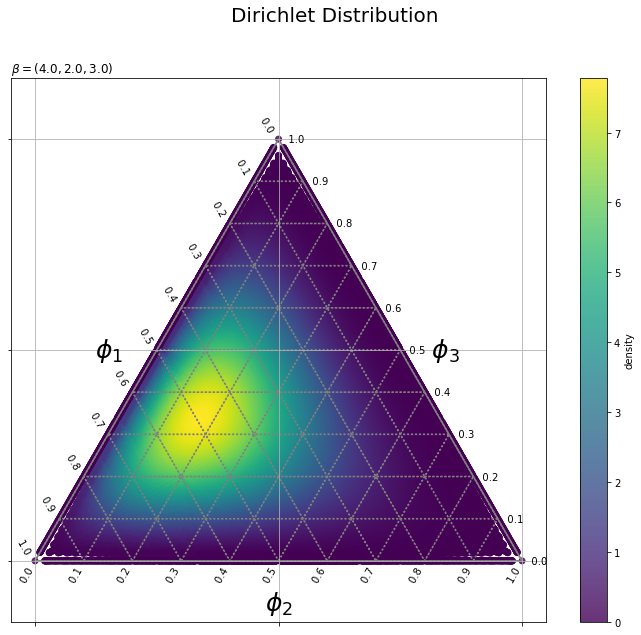

In [24]:
# ディリクレ分布の散布図によるヒートマップを作成
plt.figure(figsize=(12, 10), facecolor='white') # 図の設定
sct = plt.scatter(x=y_0_vals, y=y_1_vals, c=dens_vals, alpha=0.8) # 確率密度のヒートマップ
plt.quiver(grid_x, grid_y, grid_u, grid_v, 
           scale_units='xy', scale=1, units='dots', width=0.1, headwidth=0.1, 
           fc='none', ec='gray', linewidth=1.5, linestyle=':') # 三角座標のグリッド線
plt.quiver(axis_x, axis_y, axis_u, axis_v, 
           scale_units='xy', scale=1, units='dots', width=1.5, headwidth=1.5, 
           fc='gray', linestyle='-') # 三角座標の枠線
for val in axis_vals:
    plt.text(x=0.5*val, y=0.5*val*np.sqrt(3.0), s=str(np.round(1.0-val, 1))+' '*2, 
             ha='right', va='bottom', rotation=-60) # 三角座標のx軸目盛
    plt.text(x=val, y=0.0, s=str(np.round(val, 1))+' '*10, 
             ha='center', va='center', rotation=60) # 三角座標のy軸目盛
    plt.text(x=0.5*val+0.5, y=0.5*(1.0-val)*np.sqrt(3.0), s=' '*3+str(np.round(1.0-val, 1)), 
             ha='left', va='center') # 三角座標のz軸目盛
plt.text(x=0.25, y=0.25*np.sqrt(3.0), s='$\phi_1$'+' '*5, 
         ha='right', va='center', size=25) # 三角座標のx軸ラベル
plt.text(x=0.5, y=0.0, s='\n'+'$\phi_2$', 
         ha='center', va='top', size=25) # 三角座標のy軸ラベル
plt.text(x=0.75, y=0.25*np.sqrt(3.0), s=' '*4+'$\phi_3$', 
         ha='left', va='center', size=25) # 三角図のz軸ラベル
plt.xticks(ticks=[0.0, 0.5, 1.0], labels='') # 2次元座標のx軸目盛
plt.yticks(ticks=[0.0, 0.25*np.sqrt(3.0), 0.5*np.sqrt(3.0)], labels='') # 2次元座標のy軸目盛
plt.grid() # 2次元座標のグリッド線
plt.axis('equal') # アスペクト比
plt.suptitle(t='Dirichlet Distribution', fontsize=20) # 全体のタイトル
plt.title(label='$\\beta=('+', '.join([str(beta) for beta in beta_v])+')$', loc='left') # パラメータラベル
plt.colorbar(sct, label='density') # カラーバー
plt.show() # 描画

　`phi_vals`の要素数を増やす(間隔を狭くする)と隅の空白が埋まりますが、処理が重くなります。  
<br>

### ヒートマップ・等高線図・曲面図

 2つ目の方法は、三角座標を含めた2次元座標上の格子点を作成し、元の3次元座標に戻して確率密度を計算します。こちらの方が綺麗なグラフを作成できます。  
<br>

　作図用と計算用の$\boldsymbol{\phi}$の値を作成します。

In [25]:
# 2次元座標の値を作成
y_0_vals = np.linspace(start=0.0, stop=1.0, num=201)
y_1_vals = np.linspace(start=0.0, stop=0.5*np.sqrt(3.0), num=201)

# 2次元座標の格子点を作成
y_0_grid, y_1_grid = np.meshgrid(y_0_vals, y_1_vals)

# 格子点の形状を保存
y_shape = y_0_grid.shape

# 3次元座標の値に変換
phi_1_vals = y_0_grid.flatten() - y_1_grid.flatten() / np.sqrt(3.0)
phi_2_vals = 2.0 * y_1_grid.flatten() / np.sqrt(3.0)

# 範囲外の点を欠損値に置換
phi_1_vals = np.where(
    (phi_1_vals >= 0.0) & (phi_1_vals <= 1.0), 
    phi_1_vals, 
    np.nan
)
phi_2_vals = np.where(
    (phi_2_vals >= 0.0) & (phi_2_vals <= 1.0), 
    phi_2_vals, 
    np.nan
)

# 3次元座標の値に変換
phi_0_vals = 1.0 - phi_1_vals - phi_2_vals

# 範囲外の点を欠損値に置換
phi_0_vals = np.where(
    (phi_0_vals >= 0.0) & (phi_0_vals <= 1.0), 
    phi_0_vals, 
    np.nan
)

# 計算用の3次元座標の点を作成
phi_points = np.stack([phi_0_vals, phi_1_vals, phi_2_vals], axis=1)

　三角座標を含めた2次元座標上の格子点を作成して`y_0_grid, y_1_grid`とします。この2つの配列は作図に使います。  
　`y_0_grid, y_1_grid`を、$\phi_0 = 1 - \phi_1 - \phi_2$、$\phi_1 = y_0 - \frac{y_1}{\sqrt{3}}$、$\phi_2 = \frac{2 y_1}{\sqrt{3}}$で、3次元座標上の点($\boldsymbol{\phi}$の点)に変換して`phi_points`とします。ただし、三角座標外の点については、総和が1の値($\boldsymbol{\phi}$を満たす値)にならないので欠損値`np.nan`に置き換えます。この配列は計算に使います。  

　ディリクレ分布を計算します。

In [26]:
# ディリクレ分布の確率密度を計算
dens_vals = np.array(
    [dirichlet.pdf(x=phi_v, alpha=beta_v) if all(phi_v != np.nan) else np.nan for phi_v in phi_points]
)
print(np.round(dens_vals, 2))

[ 0.  0.  0. ... nan nan nan]


　先ほどと同様に計算します。ただし、三角座標外の要素(`phi_points`の欠損値を含む行)については、リスト内包表記の内部で`if`文を使って、欠損値`np.nan`を格納します。  

　また、全てのパラメータが1未満で確率変数に0を含む場合は、`0.0`を含む行も除きます。

```python
# ディリクレ分布の確率密度を計算
dens_vals = np.array(
    [dirichlet.pdf(x=phi_v, alpha=beta_v) if all(phi_v != np.nan) & all(phi_v != 0.0) else np.nan for phi_v in phi_points]
)
```

　ディリクレ分布のヒートマップを作成します。

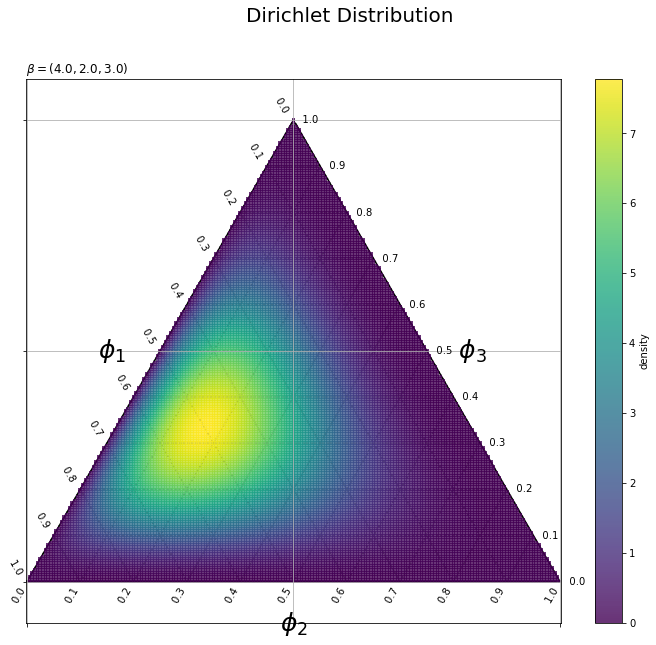

In [27]:
# ディリクレ分布のヒートマップを作成
plt.figure(figsize=(12, 10), facecolor='white') # 図の設定
plt.quiver(grid_x, grid_y, grid_u, grid_v, 
           scale_units='xy', scale=1, units='dots', width=0.1, headwidth=0.1, 
           fc='none', ec='gray', linewidth=1.5, linestyle=':') # 三角座標のグリッド線
plt.quiver(axis_x, axis_y, axis_u, axis_v, 
           scale_units='xy', scale=1, units='dots', width=1.5, headwidth=1.5, 
           fc='black', linestyle='-') # 三角座標の枠線
for val in axis_vals:
    plt.text(x=0.5*val, y=0.5*val*np.sqrt(3.0), s=str(np.round(1.0-val, 1))+' '*2, 
             ha='right', va='bottom', rotation=-60) # 三角座標のx軸目盛
    plt.text(x=val, y=0.0, s=str(np.round(val, 1))+' '*10, 
             ha='center', va='center', rotation=60) # 三角座標のy軸目盛
    plt.text(x=0.5*val+0.5, y=0.5*(1.0-val)*np.sqrt(3.0), s=' '*3+str(np.round(1.0-val, 1)), 
             ha='left', va='center') # 三角座標のz軸目盛
plt.text(x=0.25, y=0.25*np.sqrt(3.0), s='$\phi_1$'+' '*5, 
         ha='right', va='center', size=25) # 三角座標のx軸ラベル
plt.text(x=0.5, y=0.0, s='\n'+'$\phi_2$', 
         ha='center', va='top', size=25) # 三角座標のy軸ラベル
plt.text(x=0.75, y=0.25*np.sqrt(3.0), s=' '*4+'$\phi_3$', 
         ha='left', va='center', size=25) # 三角図のz軸ラベル
pcl = plt.pcolor(y_0_grid, y_1_grid, dens_vals.reshape(y_shape), 
                 alpha = 0.8) # 確率密度のヒートマップ
plt.xticks(ticks=[0.0, 0.5, 1.0], labels='') # 2次元座標のx軸目盛
plt.yticks(ticks=[0.0, 0.25*np.sqrt(3.0), 0.5*np.sqrt(3.0)], labels='') # 2次元座標のy軸目盛
plt.grid() # 2次元座標のグリッド線
plt.axis('equal') # アスペクト比
plt.colorbar(pcl, label='density') # カラーバー
plt.suptitle(t='Dirichlet Distribution', fontsize=20) # タイトル
plt.title(label='$\\beta=('+', '.join([str(val) for val in beta_v])+')$', loc='left') # パラメータラベル
plt.show() # 描画

　`plt.pcolor()`でヒートマップを描画します。  

　続いて、等高線図を作成します。

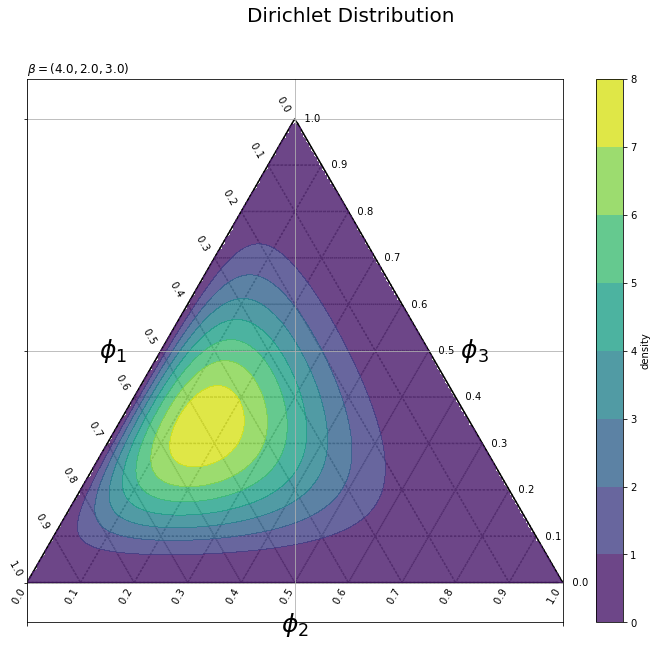

In [28]:
# ディリクレ分布の等高線図を作成
plt.figure(figsize=(12, 10), facecolor='white') # 図の設定
plt.quiver(grid_x, grid_y, grid_u, grid_v, 
           scale_units='xy', scale=1, units='dots', width=0.1, headwidth=0.1, 
           fc='none', ec='gray', linewidth=1.5, linestyle=':') # 三角座標のグリッド線
plt.quiver(axis_x, axis_y, axis_u, axis_v, 
           scale_units='xy', scale=1, units='dots', width=1.5, headwidth=1.5, 
           fc='black', linestyle='-') # 三角座標の枠線
for val in axis_vals:
    plt.text(x=0.5*val, y=0.5*val*np.sqrt(3.0), s=str(np.round(1.0-val, 1))+' '*2, 
             ha='right', va='bottom', rotation=-60) # 三角座標のx軸目盛
    plt.text(x=val, y=0.0, s=str(np.round(val, 1))+' '*10, 
             ha='center', va='center', rotation=60) # 三角座標のy軸目盛
    plt.text(x=0.5*val+0.5, y=0.5*(1.0-val)*np.sqrt(3.0), s=' '*3+str(np.round(1.0-val, 1)), 
             ha='left', va='center') # 三角座標のz軸目盛
plt.text(x=0.25, y=0.25*np.sqrt(3.0), s='$\phi_1$'+' '*5, 
         ha='right', va='center', size=25) # 三角座標のx軸ラベル
plt.text(x=0.5, y=0.0, s='\n'+'$\phi_2$', 
         ha='center', va='top', size=25) # 三角座標のy軸ラベル
plt.text(x=0.75, y=0.25*np.sqrt(3.0), s=' '*4+'$\phi_3$', 
         ha='left', va='center', size=25) # 三角図のz軸ラベル
cnf = plt.contourf(y_0_grid, y_1_grid, dens_vals.reshape(y_shape), 
                   alpha = 0.8) # 確率密度の等高線
plt.xticks(ticks=[0.0, 0.5, 1.0], labels='') # 2次元座標のx軸目盛
plt.yticks(ticks=[0.0, 0.25*np.sqrt(3.0), 0.5*np.sqrt(3.0)], labels='') # 2次元座標のy軸目盛
plt.grid() # 2次元座標のグリッド線
plt.axis('equal') # アスペクト比
plt.colorbar(cnf, label='density') # カラーバー
plt.suptitle(t='Dirichlet Distribution', fontsize=20) # タイトル
plt.title(label='$\\beta=('+', '.join([str(val) for val in beta_v])+')$', loc='left') # パラメータラベル
plt.show() # 描画

　`plt.contour()`または`contourf()`で等高線図を描画します。  

　曲面図を作成します。

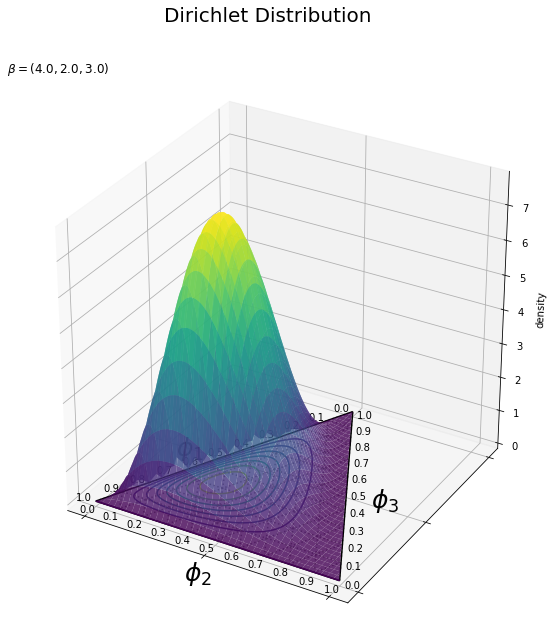

In [29]:
# ディリクレ分布の曲面図を作成
fig = plt.figure(figsize=(12, 10), facecolor='white') # 図の設定
ax = fig.add_subplot(projection='3d') # 3D用の設定
ax.quiver(grid_x, grid_y, np.zeros_like(grid_x), grid_u, grid_v, np.zeros_like(grid_x), 
          arrow_length_ratio=0.0, ec='gray', linewidth=1.5, linestyle=':') # 三角座標のグリッド線
ax.quiver(axis_x, axis_y, np.zeros_like(axis_x), axis_u, axis_v, np.zeros_like(axis_x), 
          arrow_length_ratio=0.0, ec='black', linestyle='-') # 三角座標の枠線
for val in axis_vals:
    ax.text(x=0.5*val-0.05, y=0.5*val*np.sqrt(3.0), z=0.0, s=str(np.round(1.0-val, 1)), 
            ha='center', va='center') # 三角座標のx軸目盛
    ax.text(x=val, y=0.0-0.05, z=0.0, s=str(np.round(val, 1)), 
            ha='center', va='center') # 三角座標のy軸目盛
    ax.text(x=0.5*val+0.5+0.05, y=0.5*(1.0-val)*np.sqrt(3.0), z=0.0, s=str(np.round(1.0-val, 1)), 
            ha='center', va='center') # 三角座標のz軸目盛
ax.text(x=0.25-0.1, y=0.25*np.sqrt(3.0), z=0.0, s='$\phi_1$', 
        ha='right', va='center', size=25) # 三角座標のx軸ラベル
ax.text(x=0.5, y=0.0-0.1, z=0.0-0.1, s='$\phi_2$', 
        ha='center', va='top', size=25) # 三角座標のy軸ラベル
ax.text(x=0.75+0.1, y=0.25*np.sqrt(3.0), z=0.0, s='$\phi_3$', 
        ha='left', va='center', size=25) # 三角図のz軸ラベル
ax.contour(y_0_grid, y_1_grid, dens_vals.reshape(y_shape), 
           offset=0.0) # 確率密度の等高線
ax.plot_surface(y_0_grid, y_1_grid, dens_vals.reshape(y_shape), 
                cmap='viridis', alpha=0.8) # 確率密度の曲面
ax.set_xticks(ticks=[0.0, 0.5, 1.0], labels='') # 2次元座標のx軸目盛
ax.set_yticks(ticks=[0.0, 0.25*np.sqrt(3.0), 0.5*np.sqrt(3.0)], labels='') # 2次元座標のy軸目盛
ax.set_zlabel(zlabel='density') # z軸ラベル
ax.set_box_aspect(aspect=(1, 1, 1)) # アスペクト比
fig.suptitle(t='Dirichlet Distribution', fontsize=20) # タイトル
ax.set_title(label='$\\beta=('+', '.join([str(beta) for beta in beta_v])+')$', loc='left') # パラメータラベル
#ax.view_init(elev=90, azim=-90) # 表示角度
plt.show() # 描画

　`ax.plot_surface()`で曲面図を描画します。  
<br>

　ここまでで、ディリクレ分布のグラフを描画できました。以降は、ここまでの作図処理を用いて、パラメータの影響を確認していきます。  
<br>

## パラメータと分布の形状の関係をアニメーションで可視化

　パラメータの値を少しずつ変化させて、分布の形状の変化をアニメーションで確認します。  
<br>

### 第1成分の影響

　まずは、$\beta_1$の値を変化させ、$\beta_2, \beta_3$を固定します。

In [53]:
# パラメータとして利用する値を指定
beta_1_vals = np.arange(start=1.0, stop=10.1, step=0.1).round(decimals=1)

# 固定するパラメータを指定
beta_2 = 2.0
beta_3 = 3.0

# フレーム数を設定
frame_num = len(beta_1_vals)
print(frame_num)

91


　値の間隔が一定になるように$\beta_1$の値を`beta_1_vals`として作成します。パラメータごとにフレームを切り替えるので、`beta_1_vals`の要素数がアニメーションのフレーム数になります。  
　また$\beta_2, \beta_3$を`beta_2, beta_3`として値を指定します。  

　全てのフレームで共通のグラデーションと等高線を引くための値を設定します。

In [54]:
# z軸の最小値と最大値を設定
dens_min = 0.0
dens_max = 25.0

# 等高線を引く値を設定
dens_levels = np.linspace(dens_min, dens_max, num=11)
print(dens_levels)

[ 0.   2.5  5.   7.5 10.  12.5 15.  17.5 20.  22.5 25. ]


<br>

　ディリクレ分布の等高線図のアニメーションをします。

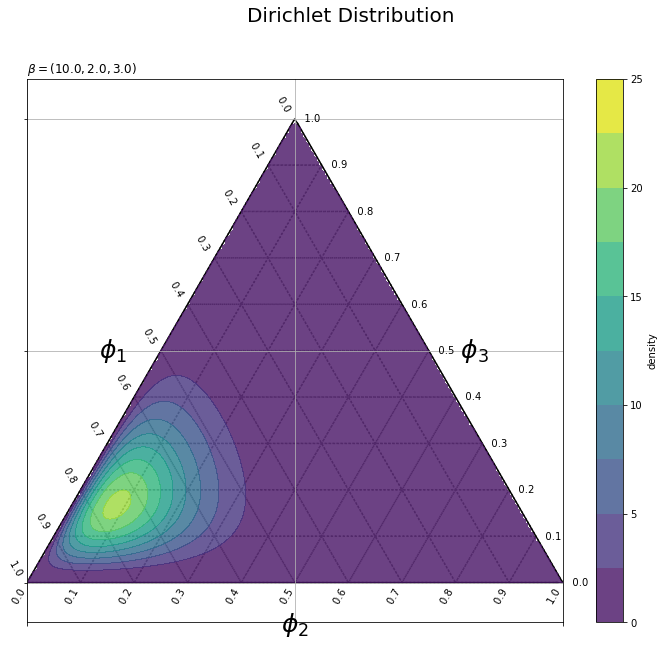

In [32]:
# ディリクレ分布の等高線図のアニメーションを作成
fig = plt.figure(figsize=(12, 10), facecolor='white') # 図の設定
fig.suptitle(t='Dirichlet Distribution', fontsize=20) # タイトル
tmp = plt.contourf(y_0_grid, y_1_grid, np.zeros(y_shape), 
                   vmin=dens_min, vmax=dens_max, levels=dens_levels, alpha = 0.8) # カラーバー用のダミー
fig.colorbar(tmp, label='density') # カラーバー

# 作図処理を関数として定義
def update(i):
    # 前フレームのグラフを初期化
    plt.cla()
    
    # i番目のパラメータを取得
    beta_1 = beta_1_vals[i]
    #beta_2 = beta_2_vals[i]
    #beta_3 = beta_3_vals[i]
    
    # パラメータを設定
    beta_v = np.array([beta_1, beta_2, beta_3])
    
    # ディリクレ分布の確率密度を計算
    dens_vals = np.array(
        [dirichlet.pdf(x=phi_v, alpha=beta_v) if all(phi_v != np.nan) else np.nan for phi_v in phi_points]
    )
    
    # パラメータラベル用の文字列を作成
    param_text = '$\\beta=('+', '.join([str(beta) for beta in beta_v])+')$'
    
    # 三角座標上の等高線図を作成
    plt.quiver(grid_x, grid_y, grid_u, grid_v, 
               scale_units='xy', scale=1, units='dots', width=0.1, headwidth=0.1, 
               fc='none', ec='gray', linewidth=1.5, linestyle=':') # 三角座標のグリッド線
    plt.quiver(axis_x, axis_y, axis_u, axis_v, 
               scale_units='xy', scale=1, units='dots', width=1.5, headwidth=1.5, 
               fc='black', linestyle='-') # 三角座標の枠線
    for val in axis_vals:
        plt.text(x=0.5*val, y=0.5*val*np.sqrt(3.0), s=str(np.round(1.0-val, 1))+' '*2, 
                 ha='right', va='bottom', rotation=-60) # 三角座標のx軸目盛
        plt.text(x=val, y=0.0, s=str(np.round(val, 1))+' '*10, 
                 ha='center', va='center', rotation=60) # 三角座標のy軸目盛
        plt.text(x=0.5*val+0.5, y=0.5*(1.0-val)*np.sqrt(3.0), s=' '*3+str(np.round(1.0-val, 1)), 
                 ha='left', va='center') # 三角座標のz軸目盛
    plt.text(x=0.25, y=0.25*np.sqrt(3.0), s='$\phi_1$'+' '*5, 
             ha='right', va='center', size=25) # 三角座標のx軸ラベル
    plt.text(x=0.5, y=0.0, s='\n'+'$\phi_2$', 
             ha='center', va='top', size=25) # 三角座標のy軸ラベル
    plt.text(x=0.75, y=0.25*np.sqrt(3.0), s=' '*4+'$\phi_3$', 
             ha='left', va='center', size=25) # 三角図のz軸ラベル
    plt.contourf(y_0_grid, y_1_grid, dens_vals.reshape(y_shape), 
                 vmin=dens_min, vmax=dens_max, levels=dens_levels, alpha = 0.8) # 確率密度の等高線
    plt.xticks(ticks=[0.0, 0.5, 1.0], labels='') # 2次元座標のx軸目盛
    plt.yticks(ticks=[0.0, 0.25*np.sqrt(3.0), 0.5*np.sqrt(3.0)], labels='') # 2次元座標のy軸目盛
    plt.grid() # 2次元座標のグリッド線
    plt.axis('equal') # アスペクト比
    plt.title(label=param_text, loc='left') # パラメータラベル

# gif画像を作成
ani = FuncAnimation(fig=fig, func=update, frames=frame_num, interval=100)

# gif画像を保存
ani.save('../../figure/Python/dirichlet_cnf_1.gif')

　各フレームの確率密度の計算と作図処理を関数として定義して、`FuncAnimation()`を使ってアニメーション(gif画像)を作成する。  

　同様に、曲面図のアニメーションを作成します。

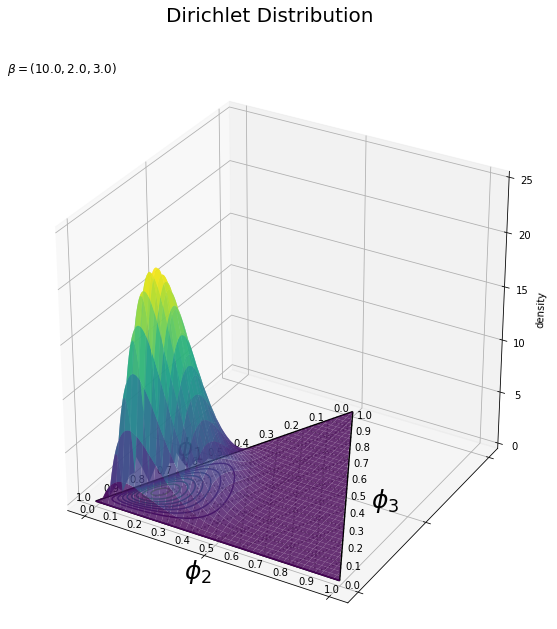

In [55]:
# ディリクレ分布の曲面図のアニメーションを作成
fig = plt.figure(figsize=(10, 10), facecolor='white') # 図の設定
ax = fig.add_subplot(projection='3d') # 3D用の設定
fig.suptitle(t='Dirichlet Distribution', fontsize=20) # タイトル

# 作図処理を関数として定義
def update(i):
    # 前フレームのグラフを初期化
    plt.cla()

    # i番目のパラメータを取得
    beta_1 = beta_1_vals[i]
    #beta_2 = beta_2_vals[i]
    #beta_3 = beta_3_vals[i]
    
    # パラメータを設定
    beta_v = np.array([beta_1, beta_2, beta_3])
    
    # ディリクレ分布の確率密度を計算
    dens_vals = np.array(
        [dirichlet.pdf(x=phi_v, alpha=beta_v) if all(phi_v != np.nan) else np.nan for phi_v in phi_points]
    )
    
    # パラメータラベル用の文字列を作成
    param_text = '$\\beta=('+', '.join([str(beta) for beta in beta_v])+')$'
    
    # 三角座標上の曲面図を作成
    ax.quiver(grid_x, grid_y, np.zeros_like(grid_x), grid_u, grid_v, np.zeros_like(grid_x), 
              arrow_length_ratio=0.0, ec='gray', linewidth=1.5, linestyle=':') # 三角座標のグリッド線
    ax.quiver(axis_x, axis_y, np.zeros_like(axis_x), axis_u, axis_v, np.zeros_like(axis_x), 
              arrow_length_ratio=0.0, ec='black', linestyle='-') # 三角座標の枠線
    for val in axis_vals:
        ax.text(x=0.5*val-0.05, y=0.5*val*np.sqrt(3.0), z=0.0, s=str(np.round(1.0-val, 1)), 
                ha='center', va='center') # 三角座標のx軸目盛
        ax.text(x=val, y=0.0-0.05, z=0.0, s=str(np.round(val, 1)), 
                ha='center', va='center') # 三角座標のy軸目盛
        ax.text(x=0.5*val+0.5+0.05, y=0.5*(1.0-val)*np.sqrt(3.0), z=0.0, s=str(np.round(1.0-val, 1)), 
                ha='center', va='center') # 三角座標のz軸目盛
    ax.text(x=0.25-0.1, y=0.25*np.sqrt(3.0), z=0.0, s='$\phi_1$', 
            ha='right', va='center', size=25) # 三角座標のx軸ラベル
    ax.text(x=0.5, y=0.0-0.1, z=0.0-0.1, s='$\phi_2$', 
            ha='center', va='top', size=25) # 三角座標のy軸ラベル
    ax.text(x=0.75+0.1, y=0.25*np.sqrt(3.0), z=0.0, s='$\phi_3$', 
            ha='left', va='center', size=25) # 三角図のz軸ラベル
    ax.contour(y_0_grid, y_1_grid, dens_vals.reshape(y_shape), 
               vmin=dens_min, vmax=dens_max, levels=dens_levels, offset=0.0) # 確率密度の等高線
    ax.plot_surface(y_0_grid, y_1_grid, dens_vals.reshape(y_shape), 
                    cmap='viridis', alpha=0.8) # 確率密度の曲面
    ax.set_xticks(ticks=[0.0, 0.5, 1.0], labels='') # 2次元座標のx軸目盛
    ax.set_yticks(ticks=[0.0, 0.25*np.sqrt(3.0), 0.5*np.sqrt(3.0)], labels='') # 2次元座標のy軸目盛
    ax.set_zlabel(zlabel='density') # z軸ラベル
    ax.set_zlim(bottom=dens_min, top=dens_max) # z軸の表示範囲
    ax.set_box_aspect(aspect=(1, 1, 1)) # アスペクト比
    ax.set_title(label=param_text, loc='left') # パラメータラベル
    #ax.view_init(elev=90, azim=-90) # 表示角度

# gif画像を作成
ani = FuncAnimation(fig=fig, func=update, frames=frame_num, interval=100)

# gif画像を保存
ani.save('../../figure/Python/dirichlet_srf_1.gif')

<br>

### 第2成分の影響

　続いて、$\beta_2$の値を変化させ、$\beta_1, \beta_3$を固定します。

In [56]:
# パラメータとして利用する値を指定
beta_2_vals = np.arange(start=1.0, stop=10.1, step=0.1).round(decimals=1)

# 固定するパラメータを指定
beta_1 = 4.0
beta_3 = 3.0

# フレーム数を設定
frame_num = len(beta_2_vals)
print(frame_num)

91


　値の間隔が一定になるように$\beta_2$の値を`beta_2_vals`として作成し、$\beta_1, \beta_3$を`beta_1, beta_3`として値を指定します。  

　「第1成分の影響」のコードで作図できます。

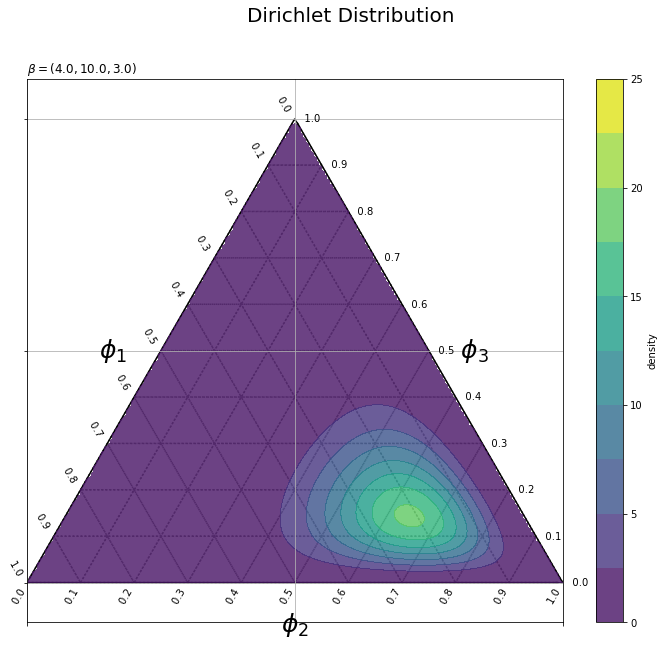

In [35]:
### 資料作成用:(再掲)

# z軸の最小値と最大値を設定
dens_min = 0.0
dens_max = 25.0

# 等高線を引く値を設定
dens_levels = np.linspace(dens_min, dens_max, num=11)

# ディリクレ分布の等高線図のアニメーションを作成
fig = plt.figure(figsize=(12, 10), facecolor='white') # 図の設定
fig.suptitle(t='Dirichlet Distribution', fontsize=20) # タイトル
tmp = plt.contourf(y_0_grid, y_1_grid, np.zeros(y_shape), 
                   vmin=dens_min, vmax=dens_max, levels=dens_levels, alpha = 0.8) # カラーバー用のダミー
fig.colorbar(tmp, label='density') # カラーバー

# 作図処理を関数として定義
def update(i):
    # 前フレームのグラフを初期化
    plt.cla()
    
    # i番目のパラメータを取得
    #beta_1 = beta_1_vals[i]
    beta_2 = beta_2_vals[i]
    #beta_3 = beta_3_vals[i]
    
    # パラメータを設定
    beta_v = np.array([beta_1, beta_2, beta_3])
    
    # ディリクレ分布の確率密度を計算
    dens_vals = np.array(
        [dirichlet.pdf(x=phi_v, alpha=beta_v) if all(phi_v != np.nan) else np.nan for phi_v in phi_points]
    )
    
    # パラメータラベル用の文字列を作成
    param_text = '$\\beta=('+', '.join([str(beta) for beta in beta_v])+')$'
    
    # 三角座標上の等高線図を作成
    plt.quiver(grid_x, grid_y, grid_u, grid_v, 
               scale_units='xy', scale=1, units='dots', width=0.1, headwidth=0.1, 
               fc='none', ec='gray', linewidth=1.5, linestyle=':') # 三角座標のグリッド線
    plt.quiver(axis_x, axis_y, axis_u, axis_v, 
               scale_units='xy', scale=1, units='dots', width=1.5, headwidth=1.5, 
               fc='black', linestyle='-') # 三角座標の枠線
    for val in axis_vals:
        plt.text(x=0.5*val, y=0.5*val*np.sqrt(3.0), s=str(np.round(1.0-val, 1))+' '*2, 
                 ha='right', va='bottom', rotation=-60) # 三角座標のx軸目盛
        plt.text(x=val, y=0.0, s=str(np.round(val, 1))+' '*10, 
                 ha='center', va='center', rotation=60) # 三角座標のy軸目盛
        plt.text(x=0.5*val+0.5, y=0.5*(1.0-val)*np.sqrt(3.0), s=' '*3+str(np.round(1.0-val, 1)), 
                 ha='left', va='center') # 三角座標のz軸目盛
    plt.text(x=0.25, y=0.25*np.sqrt(3.0), s='$\phi_1$'+' '*5, 
             ha='right', va='center', size=25) # 三角座標のx軸ラベル
    plt.text(x=0.5, y=0.0, s='\n'+'$\phi_2$', 
             ha='center', va='top', size=25) # 三角座標のy軸ラベル
    plt.text(x=0.75, y=0.25*np.sqrt(3.0), s=' '*4+'$\phi_3$', 
             ha='left', va='center', size=25) # 三角図のz軸ラベル
    plt.contourf(y_0_grid, y_1_grid, dens_vals.reshape(y_shape), 
                 vmin=dens_min, vmax=dens_max, levels=dens_levels, alpha = 0.8) # 確率密度の等高線
    plt.xticks(ticks=[0.0, 0.5, 1.0], labels='') # 2次元座標のx軸目盛
    plt.yticks(ticks=[0.0, 0.25*np.sqrt(3.0), 0.5*np.sqrt(3.0)], labels='') # 2次元座標のy軸目盛
    plt.grid() # 2次元座標のグリッド線
    plt.axis('equal') # アスペクト比
    plt.title(label=param_text, loc='left') # パラメータラベル

# gif画像を作成
ani = FuncAnimation(fig=fig, func=update, frames=frame_num, interval=100)

# gif画像を保存
ani.save('../../figure/Python/dirichlet_cnf_2.gif')

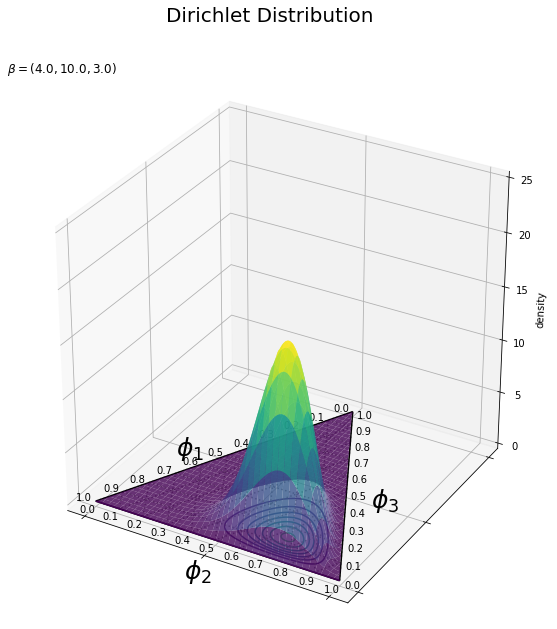

In [57]:
### 資料作成用:(再掲)

# ディリクレ分布の曲面図のアニメーションを作成
fig = plt.figure(figsize=(10, 10), facecolor='white') # 図の設定
ax = fig.add_subplot(projection='3d') # 3D用の設定
fig.suptitle(t='Dirichlet Distribution', fontsize=20) # タイトル

# 作図処理を関数として定義
def update(i):
    # 前フレームのグラフを初期化
    plt.cla()

    # i番目のパラメータを取得
    #beta_1 = beta_1_vals[i]
    beta_2 = beta_2_vals[i]
    #beta_3 = beta_3_vals[i]
    
    # パラメータを設定
    beta_v = np.array([beta_1, beta_2, beta_3])
    
    # ディリクレ分布の確率密度を計算
    dens_vals = np.array(
        [dirichlet.pdf(x=phi_v, alpha=beta_v) if all(phi_v != np.nan) else np.nan for phi_v in phi_points]
    )
    
    # パラメータラベル用の文字列を作成
    param_text = '$\\beta=('+', '.join([str(beta) for beta in beta_v])+')$'
    
    # 三角座標上の曲面図を作成
    ax.quiver(grid_x, grid_y, np.zeros_like(grid_x), grid_u, grid_v, np.zeros_like(grid_x), 
              arrow_length_ratio=0.0, ec='gray', linewidth=1.5, linestyle=':') # 三角座標のグリッド線
    ax.quiver(axis_x, axis_y, np.zeros_like(axis_x), axis_u, axis_v, np.zeros_like(axis_x), 
              arrow_length_ratio=0.0, ec='black', linestyle='-') # 三角座標の枠線
    for val in axis_vals:
        ax.text(x=0.5*val-0.05, y=0.5*val*np.sqrt(3.0), z=0.0, s=str(np.round(1.0-val, 1)), 
                ha='center', va='center') # 三角座標のx軸目盛
        ax.text(x=val, y=0.0-0.05, z=0.0, s=str(np.round(val, 1)), 
                ha='center', va='center') # 三角座標のy軸目盛
        ax.text(x=0.5*val+0.5+0.05, y=0.5*(1.0-val)*np.sqrt(3.0), z=0.0, s=str(np.round(1.0-val, 1)), 
                ha='center', va='center') # 三角座標のz軸目盛
    ax.text(x=0.25-0.1, y=0.25*np.sqrt(3.0), z=0.0, s='$\phi_1$', 
            ha='right', va='center', size=25) # 三角座標のx軸ラベル
    ax.text(x=0.5, y=0.0-0.1, z=0.0-0.1, s='$\phi_2$', 
            ha='center', va='top', size=25) # 三角座標のy軸ラベル
    ax.text(x=0.75+0.1, y=0.25*np.sqrt(3.0), z=0.0, s='$\phi_3$', 
            ha='left', va='center', size=25) # 三角図のz軸ラベル
    ax.contour(y_0_grid, y_1_grid, dens_vals.reshape(y_shape), 
               vmin=dens_min, vmax=dens_max, levels=dens_levels, offset=0.0) # 確率密度の等高線
    ax.plot_surface(y_0_grid, y_1_grid, dens_vals.reshape(y_shape), 
                    cmap='viridis', alpha=0.8) # 確率密度の曲面
    ax.set_xticks(ticks=[0.0, 0.5, 1.0], labels='') # 2次元座標のx軸目盛
    ax.set_yticks(ticks=[0.0, 0.25*np.sqrt(3.0), 0.5*np.sqrt(3.0)], labels='') # 2次元座標のy軸目盛
    ax.set_zlabel(zlabel='density') # z軸ラベル
    ax.set_zlim(bottom=dens_min, top=dens_max) # z軸の表示範囲
    ax.set_box_aspect(aspect=(1, 1, 1)) # アスペクト比
    ax.set_title(label=param_text, loc='left') # パラメータラベル
    #ax.view_init(elev=90, azim=-90) # 表示角度

# gif画像を作成
ani = FuncAnimation(fig=fig, func=update, frames=frame_num, interval=100)

# gif画像を保存
ani.save('../../figure/Python/dirichlet_srf_2.gif')

<br>

### 第3成分の影響

　$\beta_3$の値を変化させ、$\beta_1, \beta_2$を固定します。

In [58]:
# パラメータとして利用する値を指定
beta_3_vals = np.arange(start=1.0, stop=10.1, step=0.1).round(decimals=1)

# 固定するパラメータを指定
beta_1 = 4.0
beta_2 = 2.0

# フレーム数を設定
frame_num = len(beta_3_vals)
print(frame_num)

91


　同様に指定します。  

　「第1成分の影響」のコードで作図できます。

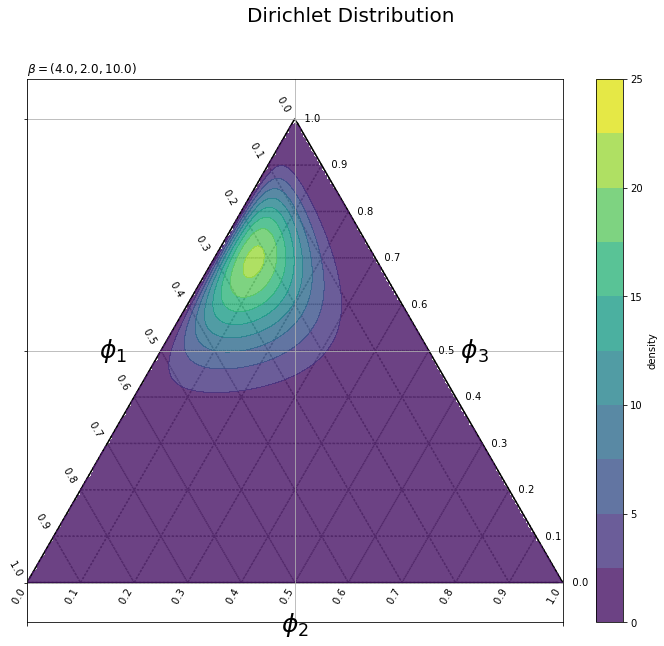

In [38]:
### 資料作成用:(再掲)

# z軸の最小値と最大値を設定
dens_min = 0.0
dens_max = 25.0

# 等高線を引く値を設定
dens_levels = np.linspace(dens_min, dens_max, num=11)

# ディリクレ分布の等高線図のアニメーションを作成
fig = plt.figure(figsize=(12, 10), facecolor='white') # 図の設定
fig.suptitle(t='Dirichlet Distribution', fontsize=20) # タイトル
tmp = plt.contourf(y_0_grid, y_1_grid, np.zeros(y_shape), 
                   vmin=dens_min, vmax=dens_max, levels=dens_levels, alpha = 0.8) # カラーバー用のダミー
fig.colorbar(tmp, label='density') # カラーバー

# 作図処理を関数として定義
def update(i):
    # 前フレームのグラフを初期化
    plt.cla()
    
    # i番目のパラメータを取得
    #beta_1 = beta_1_vals[i]
    #beta_2 = beta_2_vals[i]
    beta_3 = beta_3_vals[i]
    
    # パラメータを設定
    beta_v = np.array([beta_1, beta_2, beta_3])
    
    # ディリクレ分布の確率密度を計算
    dens_vals = np.array(
        [dirichlet.pdf(x=phi_v, alpha=beta_v) if all(phi_v != np.nan) else np.nan for phi_v in phi_points]
    )
    
    # パラメータラベル用の文字列を作成
    param_text = '$\\beta=('+', '.join([str(beta) for beta in beta_v])+')$'
    
    # 三角座標上の等高線図を作成
    plt.quiver(grid_x, grid_y, grid_u, grid_v, 
               scale_units='xy', scale=1, units='dots', width=0.1, headwidth=0.1, 
               fc='none', ec='gray', linewidth=1.5, linestyle=':') # 三角座標のグリッド線
    plt.quiver(axis_x, axis_y, axis_u, axis_v, 
               scale_units='xy', scale=1, units='dots', width=1.5, headwidth=1.5, 
               fc='black', linestyle='-') # 三角座標の枠線
    for val in axis_vals:
        plt.text(x=0.5*val, y=0.5*val*np.sqrt(3.0), s=str(np.round(1.0-val, 1))+' '*2, 
                 ha='right', va='bottom', rotation=-60) # 三角座標のx軸目盛
        plt.text(x=val, y=0.0, s=str(np.round(val, 1))+' '*10, 
                 ha='center', va='center', rotation=60) # 三角座標のy軸目盛
        plt.text(x=0.5*val+0.5, y=0.5*(1.0-val)*np.sqrt(3.0), s=' '*3+str(np.round(1.0-val, 1)), 
                 ha='left', va='center') # 三角座標のz軸目盛
    plt.text(x=0.25, y=0.25*np.sqrt(3.0), s='$\phi_1$'+' '*5, 
             ha='right', va='center', size=25) # 三角座標のx軸ラベル
    plt.text(x=0.5, y=0.0, s='\n'+'$\phi_2$', 
             ha='center', va='top', size=25) # 三角座標のy軸ラベル
    plt.text(x=0.75, y=0.25*np.sqrt(3.0), s=' '*4+'$\phi_3$', 
             ha='left', va='center', size=25) # 三角図のz軸ラベル
    plt.contourf(y_0_grid, y_1_grid, dens_vals.reshape(y_shape), 
                 vmin=dens_min, vmax=dens_max, levels=dens_levels, alpha = 0.8) # 確率密度の等高線
    plt.xticks(ticks=[0.0, 0.5, 1.0], labels='') # 2次元座標のx軸目盛
    plt.yticks(ticks=[0.0, 0.25*np.sqrt(3.0), 0.5*np.sqrt(3.0)], labels='') # 2次元座標のy軸目盛
    plt.grid() # 2次元座標のグリッド線
    plt.axis('equal') # アスペクト比
    plt.title(label=param_text, loc='left') # パラメータラベル

# gif画像を作成
ani = FuncAnimation(fig=fig, func=update, frames=frame_num, interval=100)

# gif画像を保存
ani.save('../../figure/Python/dirichlet_cnf_3.gif')

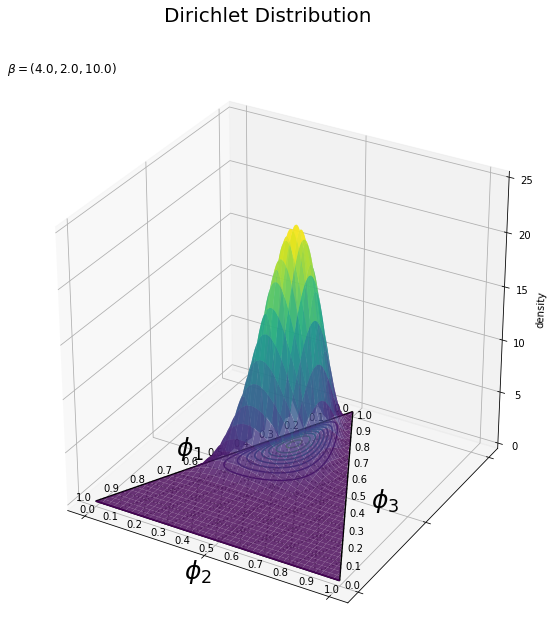

In [59]:
### 資料作成用:(再掲)

# ディリクレ分布の曲面図のアニメーションを作成
fig = plt.figure(figsize=(12, 10), facecolor='white') # 図の設定
ax = fig.add_subplot(projection='3d') # 3D用の設定
fig.suptitle(t='Dirichlet Distribution', fontsize=20) # タイトル

# 作図処理を関数として定義
def update(i):
    # 前フレームのグラフを初期化
    plt.cla()

    # i番目のパラメータを取得
    #beta_1 = beta_1_vals[i]
    #beta_2 = beta_2_vals[i]
    beta_3 = beta_3_vals[i]
    
    # パラメータを設定
    beta_v = np.array([beta_1, beta_2, beta_3])
    
    # ディリクレ分布の確率密度を計算
    dens_vals = np.array(
        [dirichlet.pdf(x=phi_v, alpha=beta_v) if all(phi_v != np.nan) else np.nan for phi_v in phi_points]
    )
    
    # パラメータラベル用の文字列を作成
    param_text = '$\\beta=('+', '.join([str(beta) for beta in beta_v])+')$'
    
    # 三角座標上の曲面図を作成
    ax.quiver(grid_x, grid_y, np.zeros_like(grid_x), grid_u, grid_v, np.zeros_like(grid_x), 
              arrow_length_ratio=0.0, ec='gray', linewidth=1.5, linestyle=':') # 三角座標のグリッド線
    ax.quiver(axis_x, axis_y, np.zeros_like(axis_x), axis_u, axis_v, np.zeros_like(axis_x), 
              arrow_length_ratio=0.0, ec='black', linestyle='-') # 三角座標の枠線
    for val in axis_vals:
        ax.text(x=0.5*val-0.05, y=0.5*val*np.sqrt(3.0), z=0.0, s=str(np.round(1.0-val, 1)), 
                ha='center', va='center') # 三角座標のx軸目盛
        ax.text(x=val, y=0.0-0.05, z=0.0, s=str(np.round(val, 1)), 
                ha='center', va='center') # 三角座標のy軸目盛
        ax.text(x=0.5*val+0.5+0.05, y=0.5*(1.0-val)*np.sqrt(3.0), z=0.0, s=str(np.round(1.0-val, 1)), 
                ha='center', va='center') # 三角座標のz軸目盛
    ax.text(x=0.25-0.1, y=0.25*np.sqrt(3.0), z=0.0, s='$\phi_1$', 
            ha='right', va='center', size=25) # 三角座標のx軸ラベル
    ax.text(x=0.5, y=0.0-0.1, z=0.0-0.1, s='$\phi_2$', 
            ha='center', va='top', size=25) # 三角座標のy軸ラベル
    ax.text(x=0.75+0.1, y=0.25*np.sqrt(3.0), z=0.0, s='$\phi_3$', 
            ha='left', va='center', size=25) # 三角図のz軸ラベル
    ax.contour(y_0_grid, y_1_grid, dens_vals.reshape(y_shape), 
               vmin=dens_min, vmax=dens_max, levels=dens_levels, offset=0.0) # 確率密度の等高線
    ax.plot_surface(y_0_grid, y_1_grid, dens_vals.reshape(y_shape), 
                    cmap='viridis', alpha=0.8) # 確率密度の曲面
    ax.set_xticks(ticks=[0.0, 0.5, 1.0], labels='') # 2次元座標のx軸目盛
    ax.set_yticks(ticks=[0.0, 0.25*np.sqrt(3.0), 0.5*np.sqrt(3.0)], labels='') # 2次元座標のy軸目盛
    ax.set_zlabel(zlabel='density') # z軸ラベル
    ax.set_zlim(bottom=dens_min, top=dens_max) # z軸の表示範囲
    ax.set_box_aspect(aspect=(1, 1, 1)) # アスペクト比
    ax.set_title(label=param_text, loc='left') # パラメータラベル
    #ax.view_init(elev=90, azim=-90) # 表示角度

# gif画像を作成
ani = FuncAnimation(fig=fig, func=update, frames=frame_num, interval=100)

# gif画像を保存
ani.save('../../figure/Python/dirichlet_srf_3.gif')

<br>

### 3つの成分の影響

　最後に、$\boldsymbol{\beta}$の値を変化させます。

In [60]:
# パラメータとして利用する値を指定
beta_1_vals = np.arange(start=1.0, stop=10.1, step=0.1).round(decimals=1)
beta_2_vals = np.arange(start=1.0, stop=10.1, step=0.1).round(decimals=1)
beta_3_vals = np.arange(start=1.0, stop=10.1, step=0.1).round(decimals=1)

# フレーム数を設定
frame_num = len(beta_1_vals)
print(frame_num)

91


　3つの`beta_*_vals`の要素数が同じになるように値を指定します。  

　全てのフレームで共通のグラデーションと等高線を引くための値を設定します。

In [61]:
# z軸の最小値と最大値を設定
dens_min = 0.0
beta_max_v = np.array([beta_1_vals.max(), beta_2_vals.max(), beta_3_vals.max()])
dens_max = np.ceil(
    dirichlet.pdf(x=(beta_max_v-1.0)/(np.sum(beta_max_v)-3.0), alpha=beta_max_v)
)

# 等高線を引く値を設定
dens_levels = np.linspace(dens_min, dens_max, num=11)
print(dens_levels)

[ 0.   2.5  5.   7.5 10.  12.5 15.  17.5 20.  22.5 25. ]


　今回は最大値を直接指定せず、上手いこと最頻値の確率密度を求めます。  

　「第1成分の影響」のコードで作図できます。

In [ ]:
### 資料作成用:(再掲)

# ディリクレ分布の等高線図のアニメーションを作成
fig = plt.figure(figsize=(12, 10), facecolor='white') # 図の設定
fig.suptitle(t='Dirichlet Distribution', fontsize=20) # タイトル
tmp = plt.contourf(y_0_grid, y_1_grid, np.zeros(y_shape), 
                   vmin=dens_min, vmax=dens_max, levels=dens_levels, alpha = 0.8) # カラーバー用のダミー
fig.colorbar(tmp, label='density') # カラーバー

# 作図処理を関数として定義
def update(i):
    # 前フレームのグラフを初期化
    plt.cla()
    
    # i番目のパラメータを取得
    beta_1 = beta_1_vals[i]
    beta_2 = beta_2_vals[i]
    beta_3 = beta_3_vals[i]
    
    # パラメータを設定
    beta_v = np.array([beta_1, beta_2, beta_3])
    
    # ディリクレ分布の確率密度を計算
    dens_vals = np.array(
        [dirichlet.pdf(x=phi_v, alpha=beta_v) if all(phi_v != np.nan) else np.nan for phi_v in phi_points]
    )
    
    # パラメータラベル用の文字列を作成
    param_text = '$\\beta=('+', '.join([str(beta) for beta in beta_v])+')$'
    
    # 三角座標上の等高線図を作成
    plt.quiver(grid_x, grid_y, grid_u, grid_v, 
               scale_units='xy', scale=1, units='dots', width=0.1, headwidth=0.1, 
               fc='none', ec='gray', linewidth=1.5, linestyle=':') # 三角座標のグリッド線
    plt.quiver(axis_x, axis_y, axis_u, axis_v, 
               scale_units='xy', scale=1, units='dots', width=1.5, headwidth=1.5, 
               fc='black', linestyle='-') # 三角座標の枠線
    for val in axis_vals:
        plt.text(x=0.5*val, y=0.5*val*np.sqrt(3.0), s=str(np.round(1.0-val, 1))+' '*2, 
                 ha='right', va='bottom', rotation=-60) # 三角座標のx軸目盛
        plt.text(x=val, y=0.0, s=str(np.round(val, 1))+' '*10, 
                 ha='center', va='center', rotation=60) # 三角座標のy軸目盛
        plt.text(x=0.5*val+0.5, y=0.5*(1.0-val)*np.sqrt(3.0), s=' '*3+str(np.round(1.0-val, 1)), 
                 ha='left', va='center') # 三角座標のz軸目盛
    plt.text(x=0.25, y=0.25*np.sqrt(3.0), s='$\phi_1$'+' '*5, 
             ha='right', va='center', size=25) # 三角座標のx軸ラベル
    plt.text(x=0.5, y=0.0, s='\n'+'$\phi_2$', 
             ha='center', va='top', size=25) # 三角座標のy軸ラベル
    plt.text(x=0.75, y=0.25*np.sqrt(3.0), s=' '*4+'$\phi_3$', 
             ha='left', va='center', size=25) # 三角図のz軸ラベル
    plt.contourf(y_0_grid, y_1_grid, dens_vals.reshape(y_shape), 
                 vmin=dens_min, vmax=dens_max, levels=dens_levels, alpha = 0.8) # 確率密度の等高線
    plt.xticks(ticks=[0.0, 0.5, 1.0], labels='') # 2次元座標のx軸目盛
    plt.yticks(ticks=[0.0, 0.25*np.sqrt(3.0), 0.5*np.sqrt(3.0)], labels='') # 2次元座標のy軸目盛
    plt.grid() # 2次元座標のグリッド線
    plt.axis('equal') # アスペクト比
    plt.title(label=param_text, loc='left') # パラメータラベル

# gif画像を作成
ani = FuncAnimation(fig=fig, func=update, frames=frame_num, interval=100)

# gif画像を保存
ani.save('../../figure/Python/dirichlet_cnf_123.gif')

NameError: name 'plt' is not defined

C:\Users\ayumu\AppData\Local\Temp\ipykernel_16048\4025854939.py:47: UserWarning: No contour levels were found within the data range.
  ax.contour(y_0_grid, y_1_grid, dens_vals.reshape(y_shape),


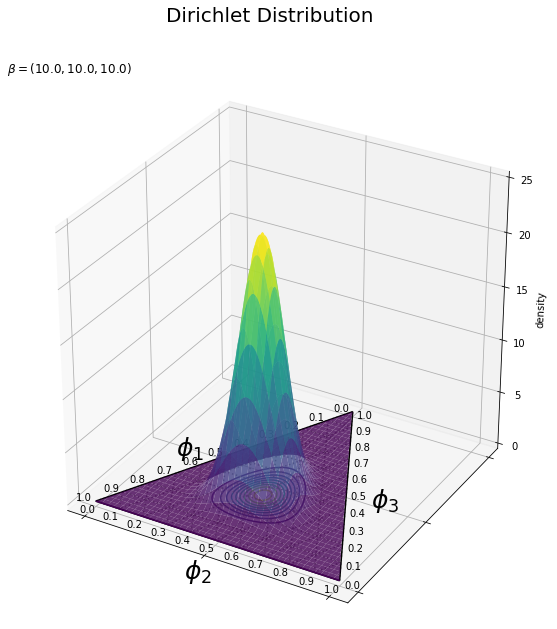

In [62]:
### 資料作成用:(再掲)

# ディリクレ分布の曲面図のアニメーションを作成
fig = plt.figure(figsize=(10, 10), facecolor='white') # 図の設定
ax = fig.add_subplot(projection='3d') # 3D用の設定
fig.suptitle(t='Dirichlet Distribution', fontsize=20) # タイトル

# 作図処理を関数として定義
def update(i):
    # 前フレームのグラフを初期化
    plt.cla()

    # i番目のパラメータを取得
    beta_1 = beta_1_vals[i]
    beta_2 = beta_2_vals[i]
    beta_3 = beta_3_vals[i]
    
    # パラメータを設定
    beta_v = np.array([beta_1, beta_2, beta_3])
    
    # ディリクレ分布の確率密度を計算
    dens_vals = np.array(
        [dirichlet.pdf(x=phi_v, alpha=beta_v) if all(phi_v != np.nan) else np.nan for phi_v in phi_points]
    )
    
    # パラメータラベル用の文字列を作成
    param_text = '$\\beta=('+', '.join([str(beta) for beta in beta_v])+')$'
    
    # 三角座標上の曲面図を作成
    ax.quiver(grid_x, grid_y, np.zeros_like(grid_x), grid_u, grid_v, np.zeros_like(grid_x), 
              arrow_length_ratio=0.0, ec='gray', linewidth=1.5, linestyle=':') # 三角座標のグリッド線
    ax.quiver(axis_x, axis_y, np.zeros_like(axis_x), axis_u, axis_v, np.zeros_like(axis_x), 
              arrow_length_ratio=0.0, ec='black', linestyle='-') # 三角座標の枠線
    for val in axis_vals:
        ax.text(x=0.5*val-0.05, y=0.5*val*np.sqrt(3.0), z=0.0, s=str(np.round(1.0-val, 1)), 
                ha='center', va='center') # 三角座標のx軸目盛
        ax.text(x=val, y=0.0-0.05, z=0.0, s=str(np.round(val, 1)), 
                ha='center', va='center') # 三角座標のy軸目盛
        ax.text(x=0.5*val+0.5+0.05, y=0.5*(1.0-val)*np.sqrt(3.0), z=0.0, s=str(np.round(1.0-val, 1)), 
                ha='center', va='center') # 三角座標のz軸目盛
    ax.text(x=0.25-0.1, y=0.25*np.sqrt(3.0), z=0.0, s='$\phi_1$', 
            ha='right', va='center', size=25) # 三角座標のx軸ラベル
    ax.text(x=0.5, y=0.0-0.1, z=0.0-0.1, s='$\phi_2$', 
            ha='center', va='top', size=25) # 三角座標のy軸ラベル
    ax.text(x=0.75+0.1, y=0.25*np.sqrt(3.0), z=0.0, s='$\phi_3$', 
            ha='left', va='center', size=25) # 三角図のz軸ラベル
    ax.contour(y_0_grid, y_1_grid, dens_vals.reshape(y_shape), 
               vmin=dens_min, vmax=dens_max, levels=dens_levels, offset=0.0) # 確率密度の等高線
    ax.plot_surface(y_0_grid, y_1_grid, dens_vals.reshape(y_shape), 
                    cmap='viridis', alpha=0.8) # 確率密度の曲面
    ax.set_xticks(ticks=[0.0, 0.5, 1.0], labels='') # 2次元座標のx軸目盛
    ax.set_yticks(ticks=[0.0, 0.25*np.sqrt(3.0), 0.5*np.sqrt(3.0)], labels='') # 2次元座標のy軸目盛
    ax.set_zlabel(zlabel='density') # z軸ラベル
    ax.set_zlim(bottom=dens_min, top=dens_max) # z軸の表示範囲
    ax.set_box_aspect(aspect=(1, 1, 1)) # アスペクト比
    ax.set_title(label=param_text, loc='left') # パラメータラベル
    #ax.view_init(elev=90, azim=-90) # 表示角度

# gif画像を作成
ani = FuncAnimation(fig=fig, func=update, frames=frame_num, interval=100)

# gif画像を保存
ani.save('../../figure/Python/dirichlet_srf_123.gif')

<br>

　この記事では、ディリクレ分布のグラフを作成しました。  
<br>